In [1]:
import pandas as pd
import numpy as np

In [2]:
books = pd.read_csv(r'D:\Machine Learning\Datasets\Book data\Books.csv')
ratings = pd.read_csv(r'D:\Machine Learning\Datasets\Book data\Ratings.csv')
users = pd.read_csv(r'D:\Machine Learning\Datasets\Book data\Users.csv')

C:\Users\pc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [4]:
books['Image-URL-M']

0         http://images.amazon.com/images/P/0195153448.0...
1         http://images.amazon.com/images/P/0002005018.0...
2         http://images.amazon.com/images/P/0060973129.0...
3         http://images.amazon.com/images/P/0374157065.0...
4         http://images.amazon.com/images/P/0393045218.0...
                                ...                        
271355    http://images.amazon.com/images/P/0440400988.0...
271356    http://images.amazon.com/images/P/0525447644.0...
271357    http://images.amazon.com/images/P/006008667X.0...
271358    http://images.amazon.com/images/P/0192126040.0...
271359    http://images.amazon.com/images/P/0767409752.0...
Name: Image-URL-M, Length: 271360, dtype: object

<AxesSubplot:>

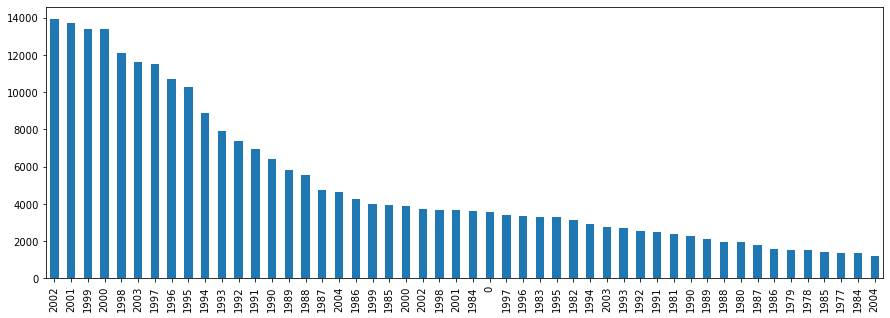

In [5]:
books['Year-Of-Publication'].value_counts().head(50).plot(kind='bar',figsize=(15,5))

<AxesSubplot:>

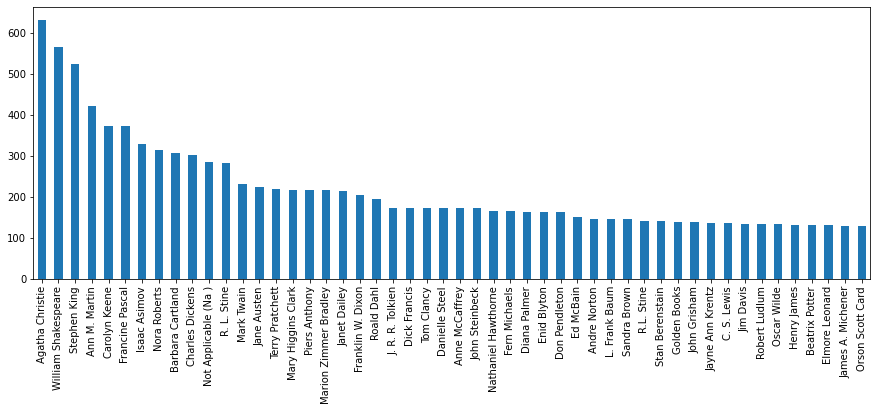

In [6]:
books['Book-Author'].value_counts().head(50).plot(kind='bar',figsize=(15,5))

In [7]:
ratings.head(2)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


<AxesSubplot:>

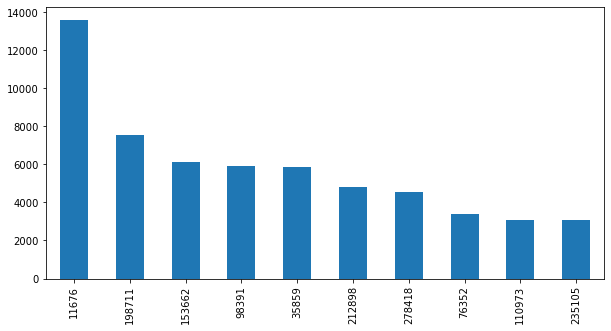

In [8]:
ratings['User-ID'].value_counts().head(10).plot(kind='bar',figsize=(10,5))

In [9]:
users.head(2)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [10]:
print('Books count:',books.shape)
print('users count:', users.shape)
print('rating count:',ratings.shape)

Books count: (271360, 8)
users count: (278858, 3)
rating count: (1149780, 3)


<AxesSubplot:ylabel='Frequency'>

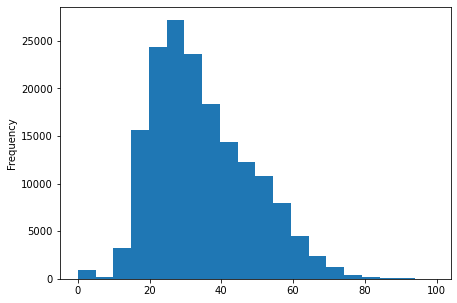

In [11]:
mask = users[users['Age']<100]
mask['Age'].plot(kind='hist',figsize =(7,5),bins=20)

In [12]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [13]:
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [14]:
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [15]:
users.duplicated().sum()

0

Populatrity Based System

In [16]:
new_data = ratings.merge(books,on='ISBN')
new_data.shape

(1031136, 10)

In [17]:
rating_count = new_data.groupby('Book-Title').count()['Book-Rating'].reset_index()
rating_count.rename(columns = {'Book-Rating':'num_rating'},inplace = True)
rating_count.head()

,Book-Title,num_rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [18]:
avg_rating = new_data.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating.rename(columns = {'Book-Rating':'avg_rating'},inplace = True)
avg_rating.head()

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00


In [19]:
populaity_df = rating_count.merge(avg_rating,on='Book-Title')
populaity_df.head()

,Book-Title,num_rating,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.00


In [20]:
populaity_df = populaity_df[populaity_df['num_rating']>=250].sort_values('avg_rating',ascending = False).head(50)
populaity_df

,Book-Title,num_rating,avg_rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219741,To Kill a Mockingbird,510,4.700000


In [21]:
populaity_df = populaity_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')

In [22]:
 fildata = populaity_df[['Book-Title','Book-Author','Image-URL-M']]

In [23]:
import pickle
pickle.dump(fildata,open('top50.pkl','wb'))

Collabartive Filtring

In [24]:
x = new_data.groupby('User-ID').count()['Book-Rating'] > 200
kaam_ka_data = x[x].index


In [25]:
filtered_rating = new_data[new_data['User-ID'].isin(kaam_ka_data)]

In [26]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index
final_rating =filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [27]:
final_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58586 entries, 63 to 1030868
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User-ID              58586 non-null  int64 
 1   ISBN                 58586 non-null  object
 2   Book-Rating          58586 non-null  int64 
 3   Book-Title           58586 non-null  object
 4   Book-Author          58586 non-null  object
 5   Year-Of-Publication  58586 non-null  object
 6   Publisher            58586 non-null  object
 7   Image-URL-S          58586 non-null  object
 8   Image-URL-M          58586 non-null  object
 9   Image-URL-L          58586 non-null  object
dtypes: int64(2), object(8)
memory usage: 4.9+ MB


In [28]:
pt = final_rating.pivot_table(index ='Book-Title', columns ='User-ID',values = 'Book-Rating')

In [29]:
pt.fillna(0,inplace = True)

In [30]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
filtered_rating.head(2)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [32]:
pd.DataFrame(pt.columns)

,User-ID
0,254
1,2276
2,2766
3,2977
4,3363
...,...
805,274308
806,275970
807,277427
808,277639


In [33]:
book_data = pd.DataFrame(pt.index)
book_data=book_data['Book-Title']
print(book_data.shape)
book_data = filtered_rating[filtered_rating['Book-Title'].isin(book_data)]
print(book_data.shape)

usser_id= pd.DataFrame(pt.columns)
usser_id=usser_id['User-ID']
print(usser_id.shape)
usser_id = book_data[book_data['User-ID'].isin(usser_id)]
print(usser_id.shape)

(706,)
(58586, 10)
(810,)
(58586, 10)


In [ ]:
link_data = pd.DataFrame(pt.index)
link_data['Book-Title'].values

In [ ]:
for i in pt.index:
    print(i)

In [36]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_score = cosine_similarity(pt)
similarity_score 

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [37]:
similarity_score 

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [38]:
pickle.dump(similarity_score ,open('similarity.pkl','wb'))

In [39]:
def recomend(book_name):
    index_num = np.where(pt.index == book_name)[0][0]
    similarity = similarity_score[index_num]
    sorted_score = sorted(list(enumerate(similarity)),key = lambda x:x[1],reverse=True)[1:6]
    
    for i in sorted_score:
        print(pt.index[i[0]])

In [40]:
def recomend(book_name):
    index_num = np.where(pt.index == book_name)[0][0]
    similarity = similarity_score[index_num]
    sorted_score = sorted(list(enumerate(similarity)),key = lambda x:x[1],reverse=True)[1:6]
    
    recc = []
    
    for i in sorted_score:
        recc.append(pt.index[i[0]])
        
    return recc

In [41]:
def recomend(book_name):
    index_num = np.where(pt.index == book_name)[0][0]
    similarity = similarity_score[index_num]
    sorted_score = sorted(list(enumerate(similarity)),key = lambda x:x[1],reverse=True)[1:6]
    
    for i in sorted_score:
        print(i[0])

In [42]:
recomend('Four Blind Mice')

666
2
628
186
123


In [43]:
def recomend(book_name):
    index_num = np.where(pt.index == book_name)[0][0]
    similarity = similarity_score[index_num]
    sorted_score = sorted(list(enumerate(similarity)),key = lambda x:x[1],reverse=True)[1:6]
    
    title =[]
    author = []
    images =[]
    
    for i in sorted_score:
        title.append(pt.index[i[0]])
        author.append(list(books[books['Book-Title']==pt.index[i[0]]].drop_duplicates('Book-Title')['Book-Author'].values))
        images.append(list(books[books['Book-Title']==pt.index[i[0]]].drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        
    
    return title,author,images

In [44]:
recomend('Four Blind Mice')

(['Violets Are Blue',
  '2nd Chance',
  'The Testament',
  'Family Album',
  'Cradle and All'],
 [['James Patterson'],
  ['James Patterson'],
  ['John Grisham'],
  ['Danielle Steel'],
  ['James Patterson']],
 [['http://images.amazon.com/images/P/0446611212.01.MZZZZZZZ.jpg'],
  ['http://images.amazon.com/images/P/0316693200.01.MZZZZZZZ.jpg'],
  ['http://images.amazon.com/images/P/0440234743.01.MZZZZZZZ.jpg'],
  ['http://images.amazon.com/images/P/0440124344.01.MZZZZZZZ.jpg'],
  ['http://images.amazon.com/images/P/0316690619.01.MZZZZZZZ.jpg']])

In [45]:
import pickle

In [46]:
pickle.dump(pt,open('pivot.pkl','wb'))

In [47]:
pt.index

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [7]:
ok = (['Animal Farm', "The Handmaid's Tale", 'Brave New World', 'The Vampire Lestat (Vampire Chronicles, Book II)', 'The Hours : A Novel'], [['George Orwell'], ['Margaret Atwood'], ['Aldous Huxley'], ['ANNE RICE'], ['Michael Cunningham']], [['http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'], ['http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'], ['http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'], ['http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'], ['http://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg']])

In [12]:
ok[2]

[['http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ['http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
 ['http://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg']]

In [58]:
top50 = pickle.load(open(r'C:\Users\pc\ML\Projects\Recc Book\top50.pkl','rb'))

In [72]:
top50_img = top50['Image-URL-M'].reset_index()

In [78]:
top50_img['Image-URL-M']

0     http://images.amazon.com/images/P/0439136350.0...
1     http://images.amazon.com/images/P/0439139597.0...
2     http://images.amazon.com/images/P/0590353403.0...
3     http://images.amazon.com/images/P/043935806X.0...
4     http://images.amazon.com/images/P/0439064872.0...
5     http://images.amazon.com/images/P/0345339681.0...
6     http://images.amazon.com/images/P/0345339703.0...
7     http://images.amazon.com/images/P/059035342X.0...
8     http://images.amazon.com/images/P/0345339711.0...
9     http://images.amazon.com/images/P/0446310786.0...
10    http://images.amazon.com/images/P/0385504209.0...
11    http://images.amazon.com/images/P/0786868716.0...
12    http://images.amazon.com/images/P/0316769487.0...
13    http://images.amazon.com/images/P/0316666343.0...
14    http://images.amazon.com/images/P/0451524934.0...
15    http://images.amazon.com/images/P/0060959037.0...
16    http://images.amazon.com/images/P/0380789019.0...
17    http://images.amazon.com/images/P/01420017

In [57]:
top50_img = top50['Image-URL-M'].reset_index()
top50_img 

,index,Image-URL-M
0,0,http://images.amazon.com/images/P/0439136350.0...
1,3,http://images.amazon.com/images/P/0439139597.0...
2,5,http://images.amazon.com/images/P/0590353403.0...
3,9,http://images.amazon.com/images/P/043935806X.0...
4,13,http://images.amazon.com/images/P/0439064872.0...
5,16,http://images.amazon.com/images/P/0345339681.0...
6,17,http://images.amazon.com/images/P/0345339703.0...
7,26,http://images.amazon.com/images/P/059035342X.0...
8,28,http://images.amazon.com/images/P/0345339711.0...
9,39,http://images.amazon.com/images/P/0446310786.0...


In [49]:
whole = pickle.load(open(r'C:\Users\pc\ML\Projects\Recc Book\whole_book_data.pkl','rb'))

In [50]:
whole

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [1]:
import streamlit
which streamlit

SyntaxError: invalid syntax (<ipython-input-1-abf54edae0d4>, line 2)